# Introduction

In [ ]:
!pip install statsmodels
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels

# import data

In [46]:
# import des données data.txt

data = pd.read_csv('data.txt', sep="\t")
data.head()

,BNP,SG
0,42.36,55.24
1,42.72,55.59
2,43.20,56.45
3,42.67,55.55
4,41.81,54.50


# Question 1 : Estimation des probabilités de défaut

In [47]:
# Noms des entreprises
entreprises = ["BNP", "SG"]

# Probabilités de défaut implicites calculées précédemment
proba_defaut_quatre = [0.01 / (1 - 0.4), 0.0120 / (1 - 0.4)]
proba_defaut_cinq = [0.0120 / (1 - 0.4), 0.0150 / (1 - 0.4)]

# Création d'un dictionnaire pour stocker les probabilités de défaut
probabilites_defaut = {}

# Remplir le dictionnaire
for i, entreprise in enumerate(entreprises):
    probabilites_defaut[entreprise] = {
        "4 ans": proba_defaut_quatre[i],
        "5 ans": proba_defaut_cinq[i]
    }

# Afficher le dictionnaire
print(probabilites_defaut)

{'BNP': {'4 ans': 0.016666666666666666, '5 ans': 0.02}, 'SG': {'4 ans': 0.02, '5 ans': 0.025}}


## Caractérisation des distributions des taux de recouvrement des deux entreprises.

In [48]:
# Distribution des taux de recouvrement des deux entreprises
# Estimation des paramètres de la loi beta par la méthode des moments ?
def moment_beta(moyenne, variance):
    alpha = (moyenne * (1 - moyenne) / variance**2 - 1) * moyenne
    beta = (moyenne * (1 - moyenne) / variance**2 - 1) * (1 - moyenne)
    return alpha, beta

In [49]:
alpha_bnp, beta_bnp = moment_beta(0.6, 0.15)
alpha_sg, beta_sg = moment_beta(0.3, 0.25)
print(alpha_bnp, beta_bnp, alpha_sg, beta_sg)

5.8 3.8666666666666667 0.708 1.652


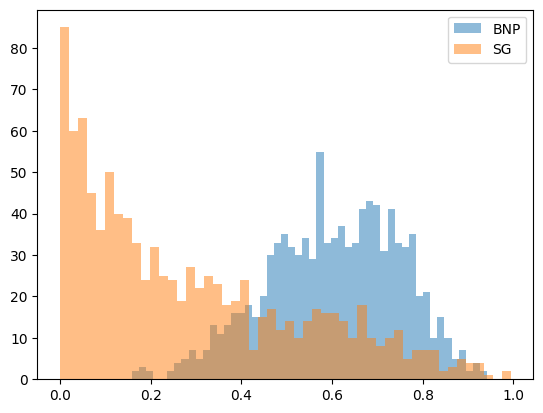

In [50]:
# Comment simuler des variables aléatoires suivant une loi beta ?
import numpy as np
import matplotlib.pyplot as plt

# Simuler des variables aléatoires suivant une loi beta
simulations_bnp = np.random.beta(alpha_bnp, beta_bnp, 1000)
simulations_sg = np.random.beta(alpha_sg, beta_sg, 1000)

# Afficher les simulations
plt.hist(simulations_bnp, bins=50, alpha=0.5, label="BNP")
plt.hist(simulations_sg, bins=50, alpha=0.5, label="SG")
plt.legend()
plt.show()
# Tracer plutôt la densité de probabilité

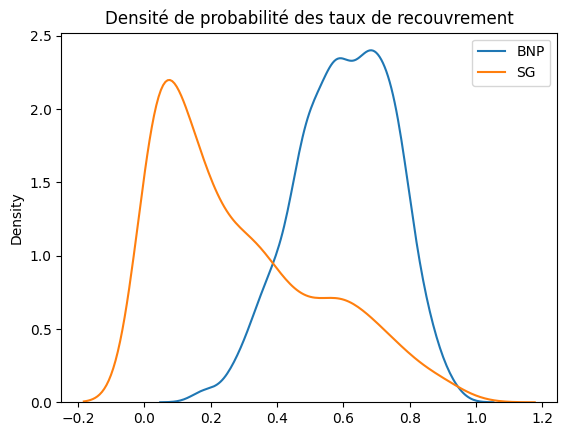

In [51]:
import seaborn as sns

sns.kdeplot(simulations_bnp, label="BNP")
sns.kdeplot(simulations_sg, label="SG")
plt.title("Densité de probabilité des taux de recouvrement")
plt.legend()
plt.show()  

# Analyse des rendements des deux entreprises : Analyse univariée et modélisation univariée des facteurs de risques.


In [52]:
# calcule des rendements des deux entreprises

returns = data.pct_change().dropna()
returns.head()

,BNP,SG
1,0.008499,0.006336
2,0.011236,0.015470
3,-0.012269,-0.015943
4,-0.020155,-0.018902
5,-0.004544,-0.000183


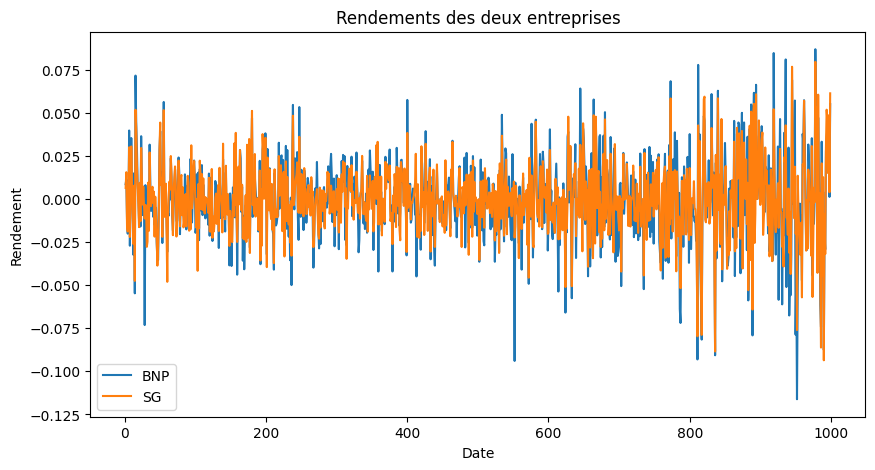

In [53]:
# Figure de la distribution des rendements des deux entreprises
plt.figure(figsize=(10, 5))
plt.plot(returns["BNP"], label="BNP")
plt.plot(returns["SG"], label="SG")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.title("Rendements des deux entreprises")
plt.show()

## Histogramme des rendements

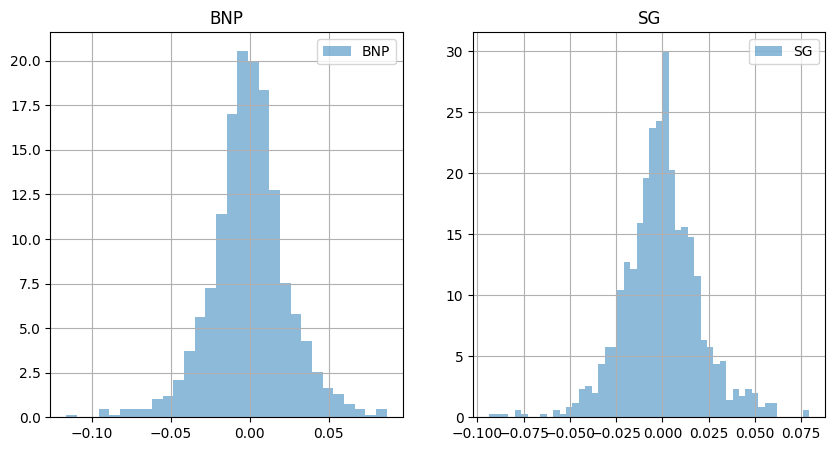

In [54]:
import scipy.stats as stats

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(returns["BNP"], bins=30, alpha=0.5, label="BNP", density=True)


plt.title("BNP")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(returns["SG"], bins=50, alpha=0.5, label="SG", density=True)


plt.title("SG")
plt.legend()
plt.grid(True)
plt.show()

Comme on l'observe sur les graphiques, les rendements des deux entreprises semblent suivre la même distribution. Dans la suite, nous allons présenterons uniquement les résultats de l'entreprise  BNP pour simplifier l'analyse. Les résultats obtenus pour l'entreprise SG seront placés en annexe.

## Estimation de la loi des rendements de BNP

### Adéquation à une loi normale


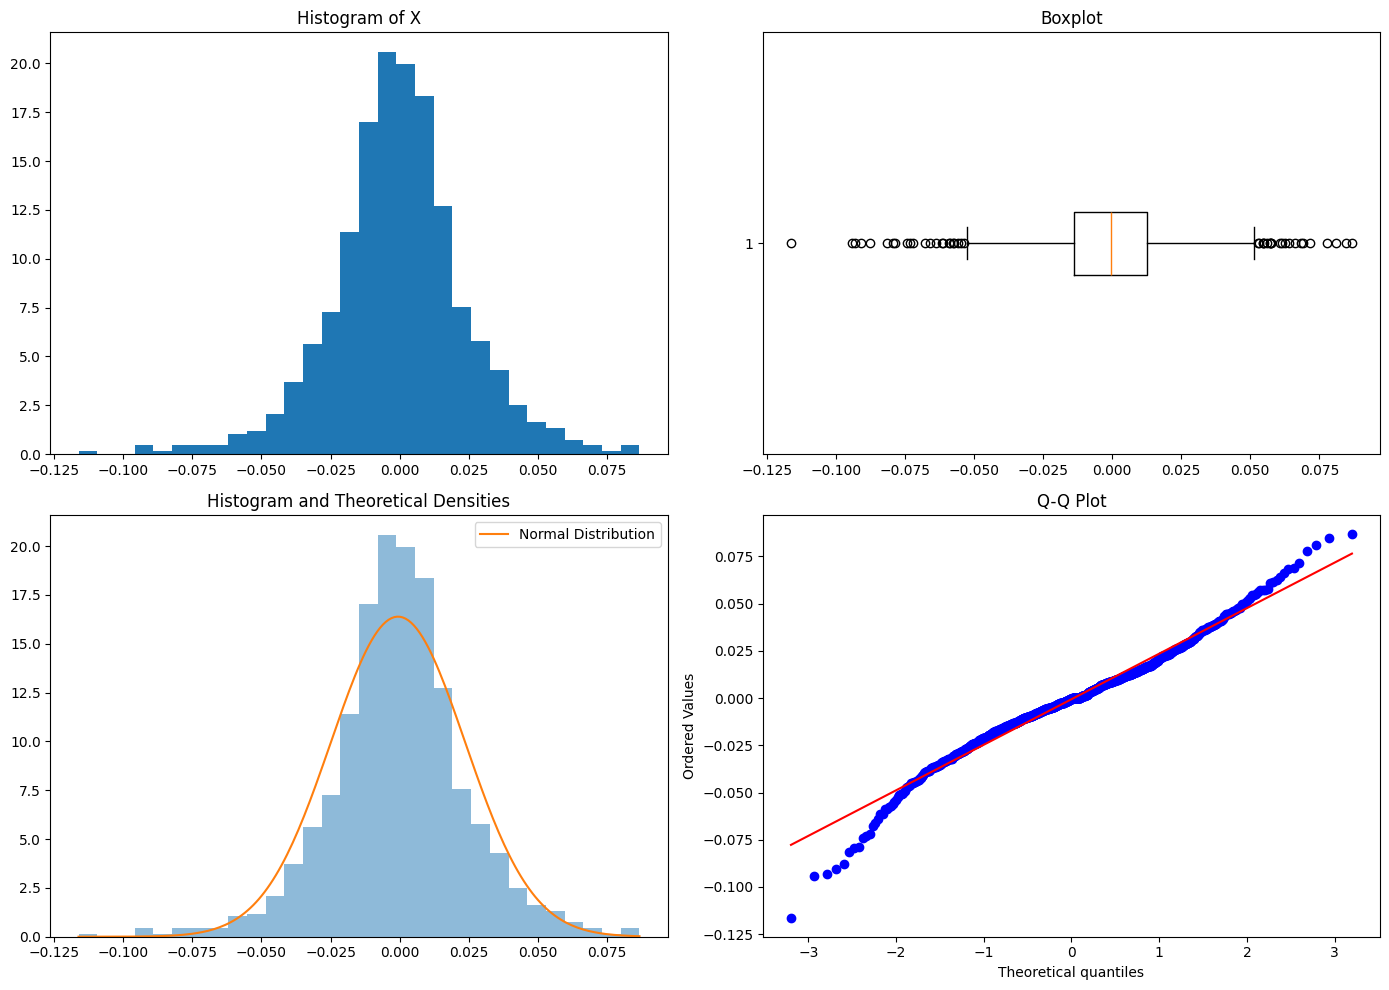

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Supposons que 'data' est un numpy array de vos données.
# Ici, je vais générer des données aléatoires à titre d'exemple.
data = returns["BNP"]
# Calcul de la moyenne et de l'écart-type des données
data_mean = data.mean()
data_std = data.std()

# Création de la figure et des axes pour 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # figsize peut être ajusté selon vos besoins

# Histogramme
axs[0, 0].hist(data, bins=30, density=True)
axs[0, 0].set_title('Histogram of X')

# Boxplot
axs[0, 1].boxplot(data, vert=False)
axs[0, 1].set_title('Boxplot')

# Histogramme avec densité théorique de la loi normale
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5)
axs[1, 0].plot(xs, stats.norm.pdf(xs, data_mean, data_std), label='Normal Distribution')
axs[1, 0].set_title('Histogram and Theoretical Densities')
axs[1, 0].legend()

# Q-Q plot avec une loi normale
stats.probplot(data, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot')

# Ajustement des graphiques pour une meilleure présentation
plt.tight_layout()

# Affichage des graphiques
plt.show()

#### Test de Kolmogorov-Smirnov cas de la loi normale

In [56]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi normale
ks_stat, ks_p_value = stats.kstest(returns['BNP'], 'norm', args=(data_mean, data_std))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.05197839970288798, P-Value: 0.008723991755178814


### Adéquation à une loi de Student

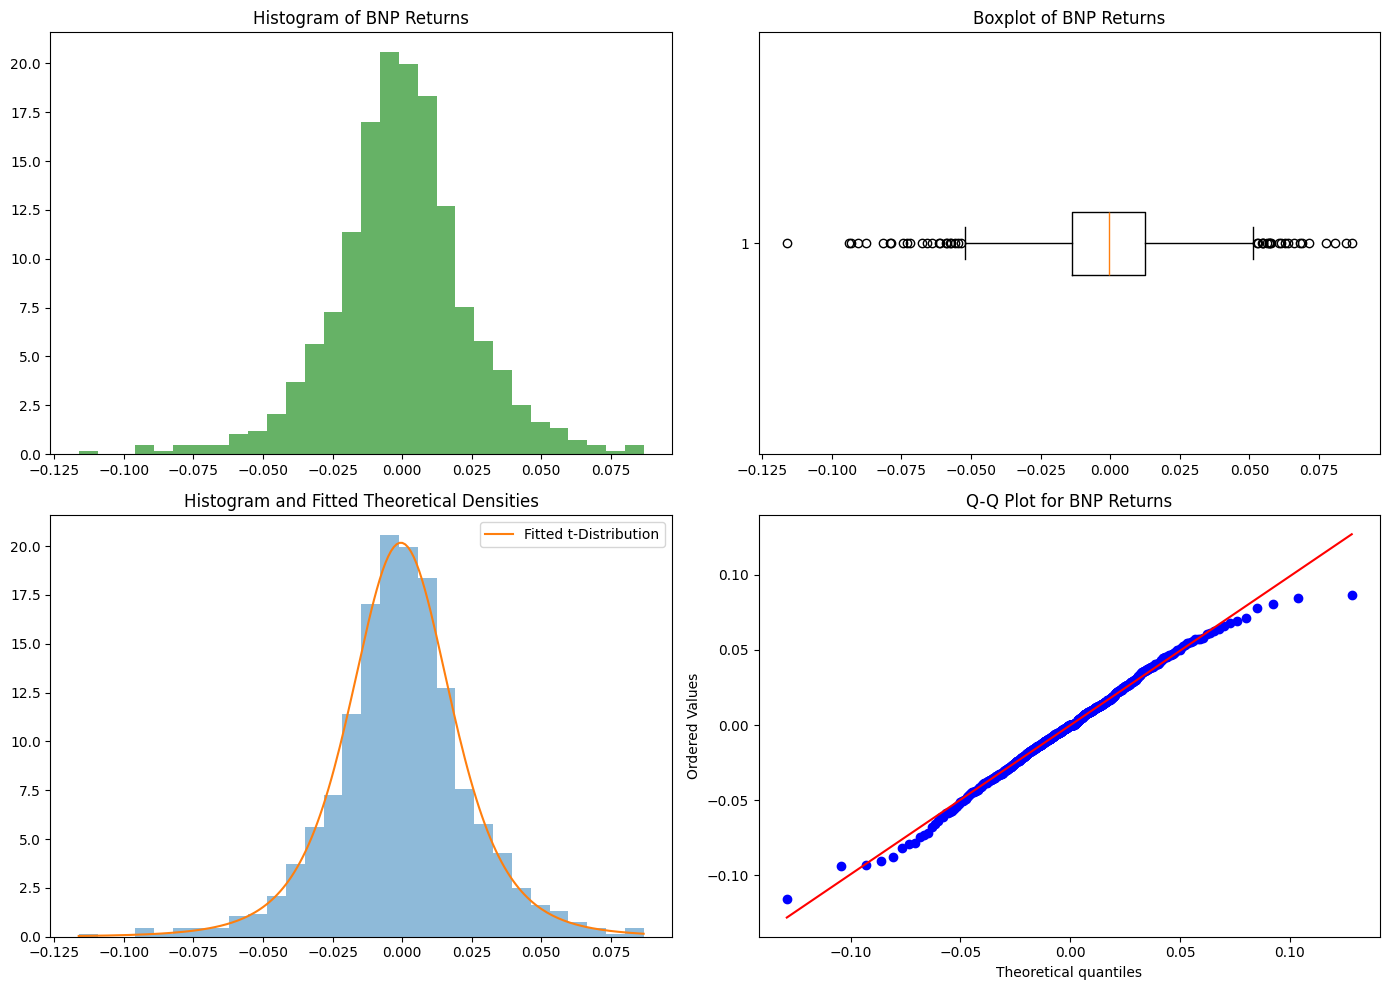

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

# Simulons un DataFrame pandas avec des rendements en guise d'exemple.
# Remplacez ceci par votre propre DataFrame `returns`.

# Utilisation de vos données réelles ici.
data = returns["BNP"].values  # Assurez-vous que 'data' est un numpy array.

# Estimation des paramètres de la distribution de Student pour vos données.
df, loc, scale = stats.t.fit(data)
estimate_bnp = [df, loc, scale]
estimate_sg = stats.t.fit(returns["SG"].values)
# Création de la figure et des axes pour 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # figsize peut être ajusté selon vos besoins.

# Histogramme.
axs[0, 0].hist(data, bins=30, density=True, alpha=0.6, color='g')
axs[0, 0].set_title('Histogram of BNP Returns')

# Boxplot.
axs[0, 1].boxplot(data, vert=False)
axs[0, 1].set_title('Boxplot of BNP Returns')

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5)
axs[1, 0].plot(xs, stats.t.pdf(xs, df=df, loc=loc, scale=scale), label='Fitted t-Distribution')
axs[1, 0].set_title('Histogram and Fitted Theoretical Densities')
axs[1, 0].legend()

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(df, loc, scale), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for BNP Returns')

# Ajustement des graphiques pour une meilleure présentation.
plt.tight_layout()

# Affichage des graphiques.
plt.show()

#### Test de Kolmogorov-Smirnov cas de la loi de Student

In [58]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi de Student
ks_stat, ks_p_value = stats.kstest(returns['BNP'], 't', args=(df, loc, scale))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.027224975680221863, P-Value: 0.44175213731191976


#### Adéquation à la distribution Normale Inverse Gaussienne

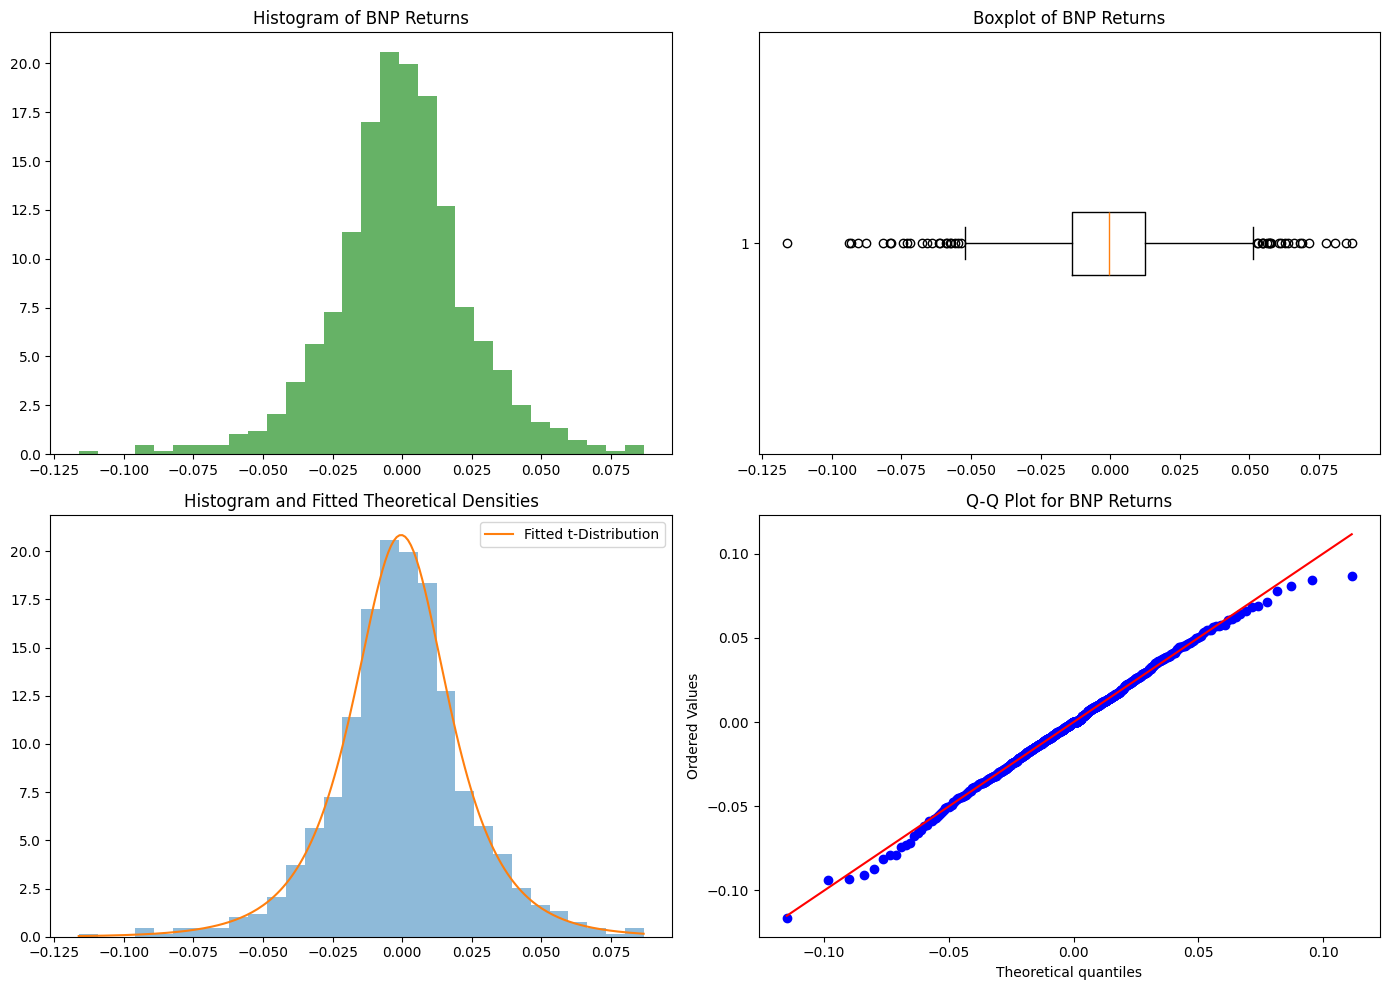

In [59]:
from scipy.stats import norminvgauss
param_nig_bnp = norminvgauss.fit(returns['BNP'].values)
param_nig_sg = norminvgauss.fit(returns['SG'])
alpha,beta,delta,mu = param_nig_bnp


data = returns['BNP'].values
# Création de la figure et des axes pour 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # figsize peut être ajusté selon vos besoins.

# Histogramme.
axs[0, 0].hist(data, bins=30, density=True, alpha=0.6, color='g')
axs[0, 0].set_title('Histogram of BNP Returns')

# Boxplot.
axs[0, 1].boxplot(data, vert=False)
axs[0, 1].set_title('Boxplot of BNP Returns')

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5)
axs[1, 0].plot(xs, stats.norminvgauss.pdf(xs, a=alpha, b=beta, loc=delta,scale=mu), label='Fitted t-Distribution')
axs[1, 0].set_title('Histogram and Fitted Theoretical Densities')
axs[1, 0].legend()

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="norminvgauss", sparams=(alpha, beta, delta,mu), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for BNP Returns')

# Ajustement des graphiques pour une meilleure présentation.
plt.tight_layout()

# Affichage des graphiques.
plt.show()

#### Test de Kolmogorov-Smirnov cas de la loi normale Inverse Gaussienne

In [60]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi normale inverse gaussienne
ks_stat, ks_p_value = stats.kstest(returns['BNP'], 'norminvgauss', args=(alpha, beta, delta, mu))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.026466332138146753, P-Value: 0.4779533387527659


#### Adéquation à la distribution Normale Inverse Gaussienne: Cas de SG

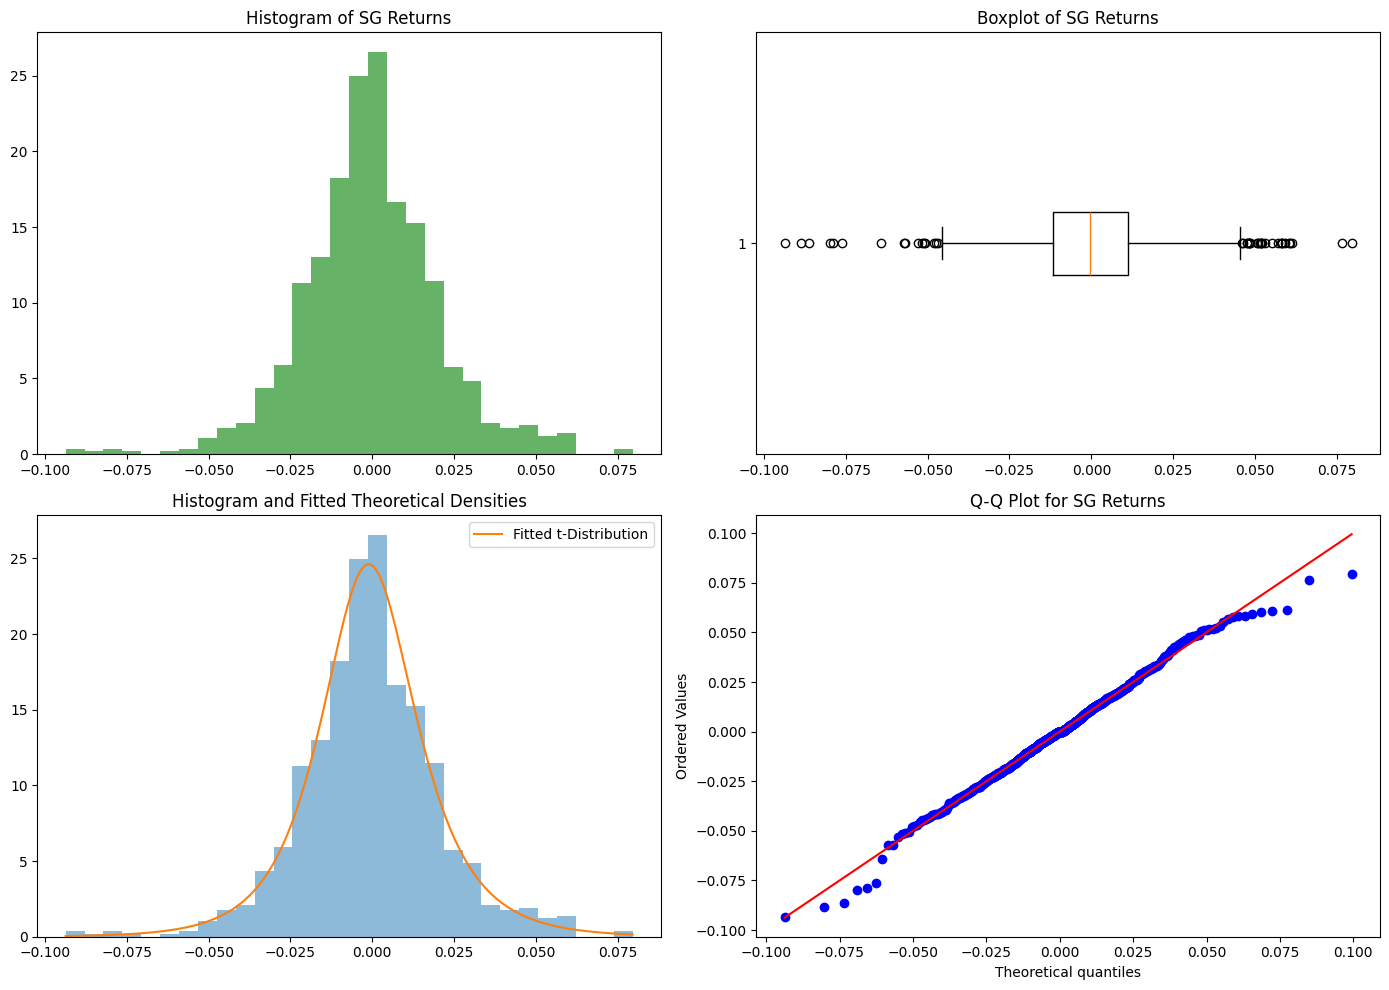

In [61]:
from scipy.stats import norminvgauss
param_nig_bnp = norminvgauss.fit(returns['BNP'].values)
param_nig_sg = norminvgauss.fit(returns['SG'])
alpha,beta,delta,mu = param_nig_sg


data = returns['SG'].values
# Création de la figure et des axes pour 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # figsize peut être ajusté selon vos besoins.

# Histogramme.
axs[0, 0].hist(data, bins=30, density=True, alpha=0.6, color='g')
axs[0, 0].set_title('Histogram of SG Returns')

# Boxplot.
axs[0, 1].boxplot(data, vert=False)
axs[0, 1].set_title('Boxplot of SG Returns')

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5)
axs[1, 0].plot(xs, stats.norminvgauss.pdf(xs, a=alpha, b=beta, loc=delta,scale=mu), label='Fitted t-Distribution')
axs[1, 0].set_title('Histogram and Fitted Theoretical Densities')
axs[1, 0].legend()

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="norminvgauss", sparams=(alpha, beta, delta,mu), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for SG Returns')

# Ajustement des graphiques pour une meilleure présentation.
plt.tight_layout()

# Affichage des graphiques.
plt.show()

#### Test de Kolmogorov-Smirnov cas de la loi normale Inverse Gaussienne: Cas de SG

In [62]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi normale inverse gaussienne
ks_stat, ks_p_value = stats.kstest(returns['SG'], 'norminvgauss', args=(alpha, beta, delta, mu))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.022462485547159905, P-Value: 0.6858660601877435


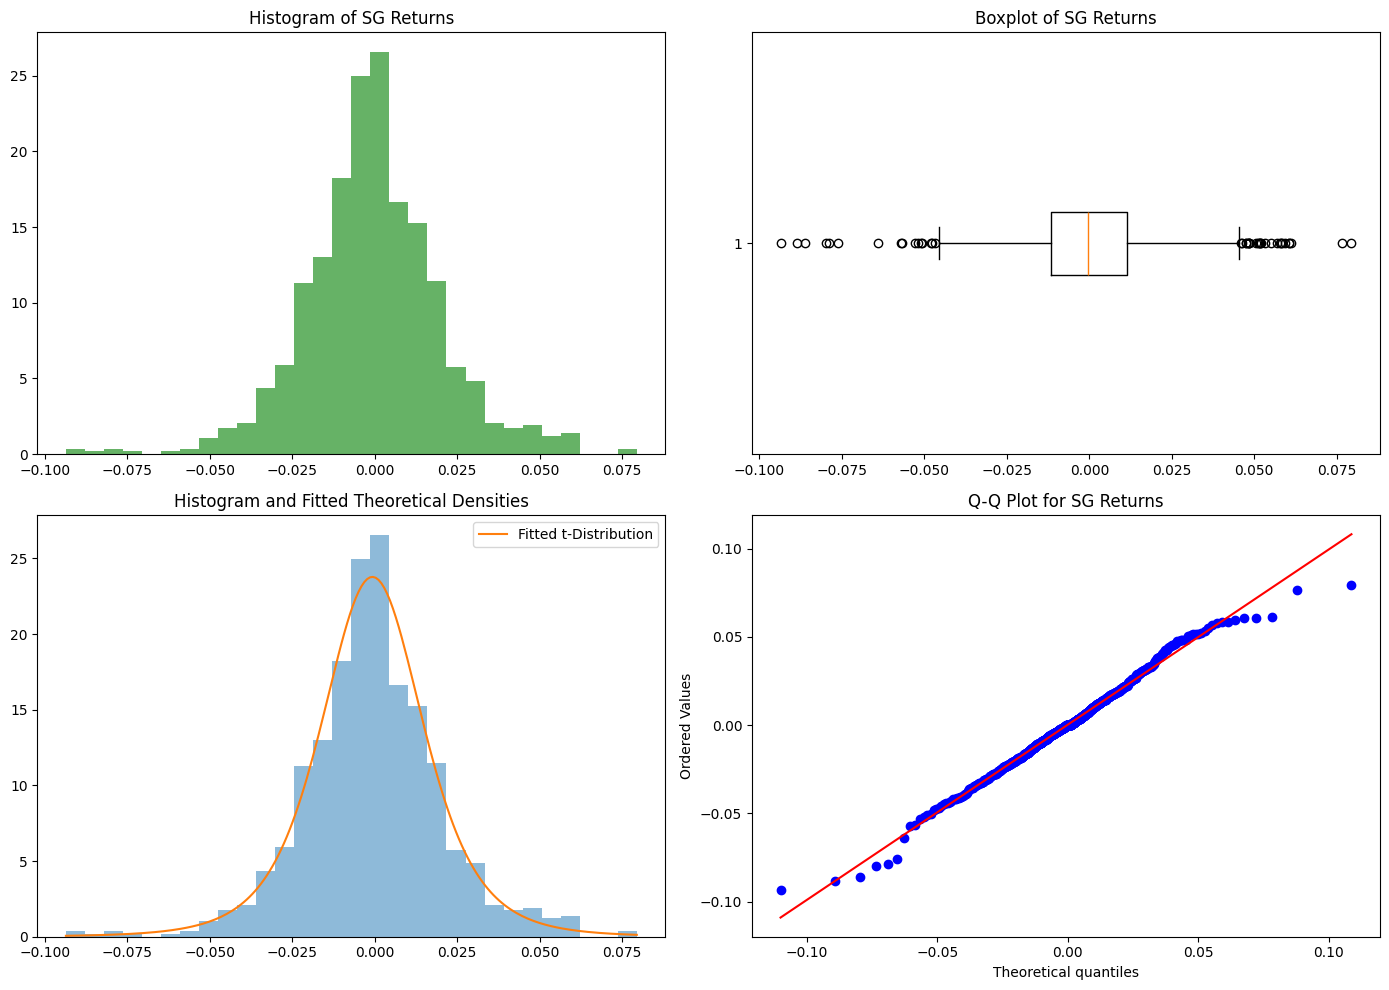

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

# Simulons un DataFrame pandas avec des rendements en guise d'exemple.
# Remplacez ceci par votre propre DataFrame `returns`.

# Utilisation de vos données réelles ici.
data = returns["SG"].values  # Assurez-vous que 'data' est un numpy array.

# Estimation des paramètres de la distribution de Student pour vos données.
df, loc, scale = stats.t.fit(data)
estimate_bnp = [df, loc, scale]
estimate_sg = stats.t.fit(returns["SG"].values)
# Création de la figure et des axes pour 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # figsize peut être ajusté selon vos besoins.

# Histogramme.
axs[0, 0].hist(data, bins=30, density=True, alpha=0.6, color='g')
axs[0, 0].set_title('Histogram of SG Returns')

# Boxplot.
axs[0, 1].boxplot(data, vert=False)
axs[0, 1].set_title('Boxplot of SG Returns')

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5)
axs[1, 0].plot(xs, stats.t.pdf(xs, df=df, loc=loc, scale=scale), label='Fitted t-Distribution')
axs[1, 0].set_title('Histogram and Fitted Theoretical Densities')
axs[1, 0].legend()

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(df, loc, scale), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for SG Returns')

# Ajustement des graphiques pour une meilleure présentation.
plt.tight_layout()

# Affichage des graphiques.
plt.show()

#### Test de Kolmogorov-Smirnov cas de la loi de Student: Cas de SG 

In [64]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi de Student
ks_stat, ks_p_value = stats.kstest(returns['SG'], 't', args=(df, loc, scale))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.025635055104284543, P-Value: 0.5192062455378086


#### Test de Kolmogorov-Smirnov cas de la loi gaussienne: Cas de SG 

In [65]:
# Test de Kolmogorov-Smirnov
# Test de Kolmogorov-Smirnov pour la loi normale
ks_stat, ks_p_value = stats.kstest(returns['SG'], 'norm', args=(data_mean, data_std))
print(f"KS Statistic: {ks_stat}, P-Value: {ks_p_value}")

KS Statistic: 0.07603062590181286, P-Value: 1.809846994758323e-05


La loi choisie pour modéliser les rendements de BNP et de SG est la loi normale inverse gaussienne.

In [66]:
# Appliquons la fonction de repartition de la loi normale inverse gaussienne à nos données bnp
 
uniform = pd.DataFrame(index=returns.index, columns=returns.columns)

alpha, beta,delta, mu = param_nig_bnp
uniform['BNP'] = norminvgauss.cdf(returns['BNP'],alpha, beta,delta, mu )
alpha, beta,delta, mu = param_nig_sg
uniform['SG'] = norminvgauss.cdf(returns['SG'],alpha, beta,delta, mu )
uniform.head()

,BNP,SG
1,0.677770,0.665862
2,0.724110,0.820548
3,0.275917,0.187820
4,0.171854,0.150139
5,0.416402,0.514542


# Question 4 : Etude de la dépendance entre les facteurs de risques sur la base des critères non paramétriques.

## Etude graphique : Dépendogramme

C:\Users\johns\AppData\Local\Temp\ipykernel_23464\3763219252.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(returns["BNP"], returns["SG"], cmap="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


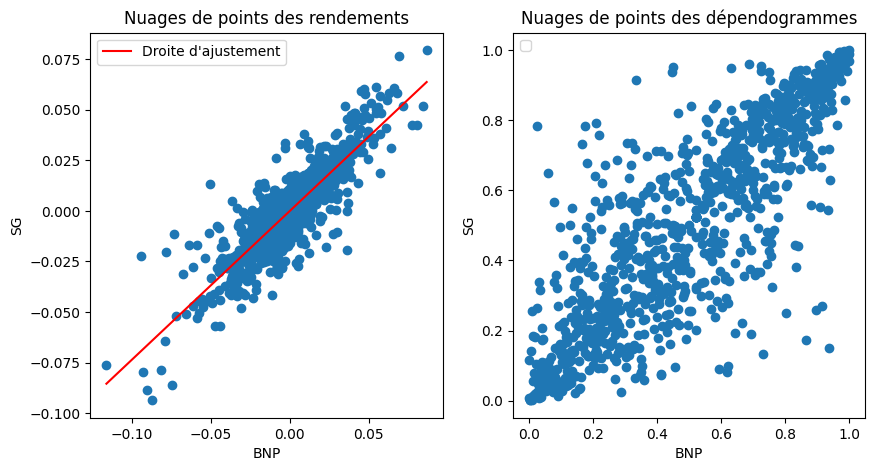

In [67]:
def dependogramme(data):
    rank = data.rank()
    uniform = rank/(len(data))
    return uniform
dependo =dependogramme(returns)


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) # 1 ligne, 2 colonnes, premier graphique
# nuages de points des données BNP et SG
plt.scatter(returns["BNP"], returns["SG"], cmap="viridis")
# Ajout la droite qui s'ajuste aux données
plt.plot(np.unique(returns["BNP"]), np.poly1d(np.polyfit(returns["BNP"], returns["SG"], 1))(np.unique(returns["BNP"])), color="red", label="Droite d'ajustement")

plt.title("Nuages de points des rendements")
plt.xlabel("BNP")
plt.ylabel("SG")
plt.legend()
plt.grid(False)

plt.subplot(1,2,2)
plt.scatter(dependo["BNP"], dependo["SG"])


plt.title("Nuages de points des dépendogrammes")
plt.xlabel("BNP")
plt.ylabel("SG")
plt.legend()
plt.grid(False)
plt.show()

## Coefficients de corrélation de Pearson, Spearman et Kendall

In [68]:
# Calcul de la corrélation de Pearson
correlation_pearson = returns.corr()
print(correlation_pearson)

          BNP        SG
BNP  1.000000  0.864659
SG   0.864659  1.000000


In [69]:
# Calcul de la corrélation de Spearman
correlation_spearman = returns.corr(method="spearman")
print(correlation_spearman)

          BNP        SG
BNP  1.000000  0.840957
SG   0.840957  1.000000


In [70]:
# Calcul de la corrélation de Kendall
correlation_kendall = returns.corr(method="kendall")
print(correlation_kendall)

          BNP        SG
BNP  1.000000  0.669096
SG   0.669096  1.000000


# Question 5 : Modélisation de la dépendance entre les facteurs de risques à l'aide des copules paramétriques.

# On fit une copule gaussienne et estimations des paramètres par la méthode IFM.

Il faut noter qu'à la question,3 nous avons estimé plusieurs loi et les paramètres associés sur les données par la méthode du maximum de vraisemblance. Nous allons utiliser ces paramètres pour la modélisation de la copule c'est-à-dire pour estimer les paramètres de la copule gaussienne.


In [71]:
from scipy.stats import norm, t
from scipy.optimize import minimize
import numpy as np
import statsmodels.api as sm
from statsmodels.distributions.copula.api import (
    StudentTCopula, GumbelCopula, GaussianCopula,FrankCopula,ClaytonCopula)

#import statsmodels.distributions.copula
#dir(statsmodels.distributions.copula)

def log_likelihood(params, u, copula_type='gaussian'):

    if isinstance(u, pd.DataFrame):
        u = u.values
    if copula_type == 'gaussian':
        rho = params[0]
        corr_matrix = np.array([[1, rho], [rho, 1]])
        copula = GaussianCopula(corr=corr_matrix)
    elif copula_type == 'student':
        rho, nu = params
        corr_matrix = np.array([[1, rho], [rho, 1]])
        copula = StudentTCopula(df=nu, corr=corr_matrix)
    else:
        raise ValueError("Unsupported copula type")

    logpdf_values = copula.logpdf(u)
    neg_log_likelihood = -np.sum(logpdf_values)
    
    return neg_log_likelihood

### Estimation des paramètres des copules

In [72]:
# Estimation des paramètres de la copule student
params = [0.6, 3]
result = minimize(log_likelihood, x0=params, args=(uniform, 'student'), method='Nelder-Mead')
print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -730.7954587372859
             x: [ 8.664e-01  3.044e+00]
           nit: 46
          nfev: 89
 final_simplex: (array([[ 8.664e-01,  3.044e+00],
                       [ 8.664e-01,  3.044e+00],
                       [ 8.664e-01,  3.044e+00]]), array([-7.308e+02, -7.308e+02, -7.308e+02]))


### Kendall plot: Cas de la copule de Student

In [73]:
def calculer_Hi_vect(u):
    
    # Créer un tableau pour stocker les résultats
    H = np.zeros(len(u), dtype=int)
    
    # Comparaison de chaque paire une seule fois
    for i in range(len(u)):
        # Créer des masques booléens pour les conditions
        cond1 = u[:, 0] <= u[i, 0]  # u_{1,j} <= u_{1,i}
        cond2 = u[:, 1] <= u[i, 1]  # u_{2,j} <= u_{2,i}
        # Appliquer les conditions et exclure le cas où i == j
        H[i] = (np.sum(np.logical_and(cond1, cond2)) - 1)
        
    return H/(len(u)-1)    
    
   
H_i = calculer_Hi_vect(dependo.values)
H_i

array([0.59819639, 0.70440882, 0.16332665, 0.11122244, 0.37174349,
       0.92685371, 0.08016032, 0.33366733, 0.91382766, 0.5751503 ,
       0.4238477 , 0.05310621, 0.66833667, 0.01102204, 0.98396794,
       0.95390782, 0.8507014 , 0.61523046, 0.38577154, 0.15430862,
       0.6002004 , 0.16132265, 0.91783567, 0.66232465, 0.2745491 ,
       0.57214429, 0.38276553, 0.00901804, 0.40681363, 0.33166333,
       0.0751503 , 0.08617234, 0.6252505 , 0.13226453, 0.8997996 ,
       0.43887776, 0.29358717, 0.4008016 , 0.56813627, 0.26553106,
       0.50701403, 0.10320641, 0.30360721, 0.24148297, 0.08416834,
       0.0250501 , 0.04008016, 0.26052104, 0.88877756, 0.94689379,
       0.61222445, 0.72244489, 0.08617234, 0.6012024 , 0.97795591,
       0.23747495, 0.36472946, 0.60420842, 0.13827655, 0.01302605,
       0.23547094, 0.29559118, 0.60721443, 0.4739479 , 0.8496994 ,
       0.70641283, 0.23446894, 0.10220441, 0.40581162, 0.61823647,
       0.79458918, 0.59519038, 0.10521042, 0.18537074, 0.53106

In [74]:
import numpy as np


def monte_carlo_Hi(S,n=999):
    """ 
    Cette fonction permet par monte carlo d'estimer la copule théorique
    """
    
    H_means = np.zeros((S, n))   

    for s in range(S):
        u = StudentTCopula(df=3.044, corr=8.664e-01).rvs(n)
        H_means[s] = np.sort(calculer_Hi_vect(u))
        
    return np.mean(H_means, axis=0)

monte_carlo_Hi(S=1000, n=999)

array([0.00000000e+00, 5.36072144e-04, 1.11823647e-03, 1.70440882e-03,
       2.27855711e-03, 2.91082164e-03, 3.47795591e-03, 4.07314629e-03,
       4.66432866e-03, 5.25551102e-03, 5.85070140e-03, 6.45991984e-03,
       7.06913828e-03, 7.66533066e-03, 8.22545090e-03, 8.79058116e-03,
       9.43587174e-03, 1.00721443e-02, 1.06523046e-02, 1.12825651e-02,
       1.19068136e-02, 1.25020040e-02, 1.31012024e-02, 1.37184369e-02,
       1.42965932e-02, 1.48957916e-02, 1.55060120e-02, 1.61142285e-02,
       1.67034068e-02, 1.73466934e-02, 1.79569138e-02, 1.85601202e-02,
       1.92304609e-02, 1.98186373e-02, 2.04408818e-02, 2.10511022e-02,
       2.16793587e-02, 2.23126253e-02, 2.28967936e-02, 2.34949900e-02,
       2.41042084e-02, 2.47204409e-02, 2.53416834e-02, 2.60320641e-02,
       2.66593186e-02, 2.73096192e-02, 2.79569138e-02, 2.86062124e-02,
       2.92254509e-02, 2.98597194e-02, 3.05230461e-02, 3.11573146e-02,
       3.18006012e-02, 3.24148297e-02, 3.30741483e-02, 3.37134269e-02,
      

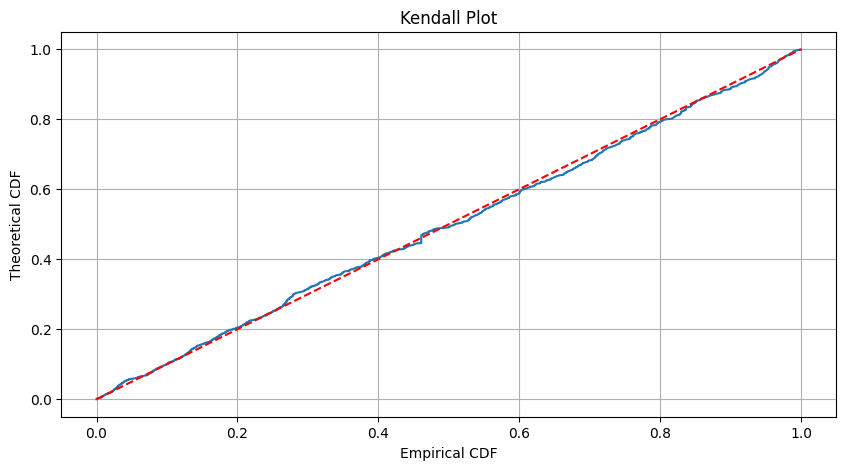

In [75]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(np.sort(H_i), np.sort(monte_carlo_Hi(S=1000, n=999)))
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("Empirical CDF")
plt.ylabel("Theoretical CDF")
plt.title("Kendall Plot")
plt.grid(True)
plt.show()

### Modélisation par une copule

##### Estimation des paramètres

In [76]:
def log_likelihood_copul(params, u, copula_type='gaussian'):

    if isinstance(u, pd.DataFrame):
        u = u.values
    if copula_type == 'gaussian':
        rho = params[0]
        copula = GaussianCopula(corr=rho)
    elif copula_type == 'student':
        rho, nu = params
        corr_matrix = np.array([[1, rho], [rho, 1]])
        copula = StudentTCopula(df=nu, corr=corr_matrix)
    elif copula_type == "gumbel":
        theta = params[0]
        copula= GumbelCopula(theta = theta)
    elif copula_type == "clayton":
        theta = params[0]
        copula= ClaytonCopula(theta = theta)
    elif copula_type == "frank":
        theta = params[0]
        copula= FrankCopula(theta = theta)
    else:
        raise ValueError("Unsupported copula type")

    logpdf_values = copula.logpdf(u)
    neg_log_likelihood = -np.sum(logpdf_values)
    
    return neg_log_likelihood

In [77]:
ellipt_copula = ["gaussian", "student"]
arch_copula = ["clayton", "gumbel", "frank"]
ellipt_params = [[0.6], [0.6,3]]
arch_params = [3]
params_result = {}
for i, copula_type in enumerate(ellipt_copula):
    minim = minimize(log_likelihood_copul, x0=ellipt_params[i], args=(uniform, copula_type), method='Nelder-Mead')
    params_result[copula_type]= minim.x
for copula_type in arch_copula:
    minim = minimize(log_likelihood_copul, x0=arch_params, args=(uniform, copula_type), method='Nelder-Mead')
    params_result[copula_type]= minim.x

params_result

{'gaussian': array([0.86021484]),
 'student': array([0.8663905 , 3.04396568]),
 'clayton': array([2.4744873]),
 'gumbel': array([2.99128418]),
 'frank': array([10.1409668])}

### Kendall plot

In [78]:

def monte_carlo_Hi_cop(S, params, copula_type= "gaussian", n=999):
    """ 
    Cette fonction permet par monte carlo d'estimer la copule théorique
    """
    
    H_means = np.zeros((S, n))   

    for s in range(S):
        if copula_type == "student":
            corr, df = params
            u = StudentTCopula(df=df, corr=corr).rvs(n)
        elif copula_type == "gaussian":
            corr = params[0]
            u = GaussianCopula(corr = corr).rvs(n)
        elif copula_type == "gumbel":
            theta = params[0]
            u= GumbelCopula(theta = theta).rvs(n)
        elif copula_type == "clayton":
            theta = params[0]
            u= ClaytonCopula(theta = theta).rvs(n)
        elif copula_type == "frank":
            theta = params[0]
            u= FrankCopula(theta = theta).rvs(n)
        else:
            raise ValueError("Unsupported copula type")
        H_means[s] = np.sort(calculer_Hi_vect(u))          
        
    return np.mean(H_means, axis=0)


In [79]:
copulas = ["gaussian", "student", "clayton", "gumbel", "frank"]
MonteCarlo_Hi = {}
for copula_type in copulas:
    MonteCarlo_Hi[copula_type]= monte_carlo_Hi_cop(S = 1000, params = params_result[copula_type], copula_type= copula_type, n=999)
MonteCarlo_Hi

d:\projet_ali_zerad\env\Lib\site-packages\statsmodels\tools\rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)


{'gaussian': array([0.00000000e+00, 3.20641283e-04, 7.26452906e-04, 1.17635271e-03,
        1.62625251e-03, 2.11623246e-03, 2.63226453e-03, 3.14428858e-03,
        3.64028056e-03, 4.16032064e-03, 4.66933868e-03, 5.18937876e-03,
        5.68837675e-03, 6.15831663e-03, 6.70641283e-03, 7.24749499e-03,
        7.75350701e-03, 8.27054108e-03, 8.83667335e-03, 9.36773547e-03,
        9.87675351e-03, 1.04288577e-02, 1.09749499e-02, 1.15110220e-02,
        1.20380762e-02, 1.26022044e-02, 1.31723447e-02, 1.37104208e-02,
        1.42785571e-02, 1.48356713e-02, 1.54178357e-02, 1.59789579e-02,
        1.65611222e-02, 1.70941884e-02, 1.77234469e-02, 1.83296593e-02,
        1.89108216e-02, 1.95010020e-02, 2.01232465e-02, 2.07004008e-02,
        2.13056112e-02, 2.18837675e-02, 2.24368737e-02, 2.30330661e-02,
        2.36072144e-02, 2.41763527e-02, 2.47334669e-02, 2.53186373e-02,
        2.59609218e-02, 2.65611222e-02, 2.72174349e-02, 2.78266533e-02,
        2.84108216e-02, 2.90460922e-02, 2.96292585e-

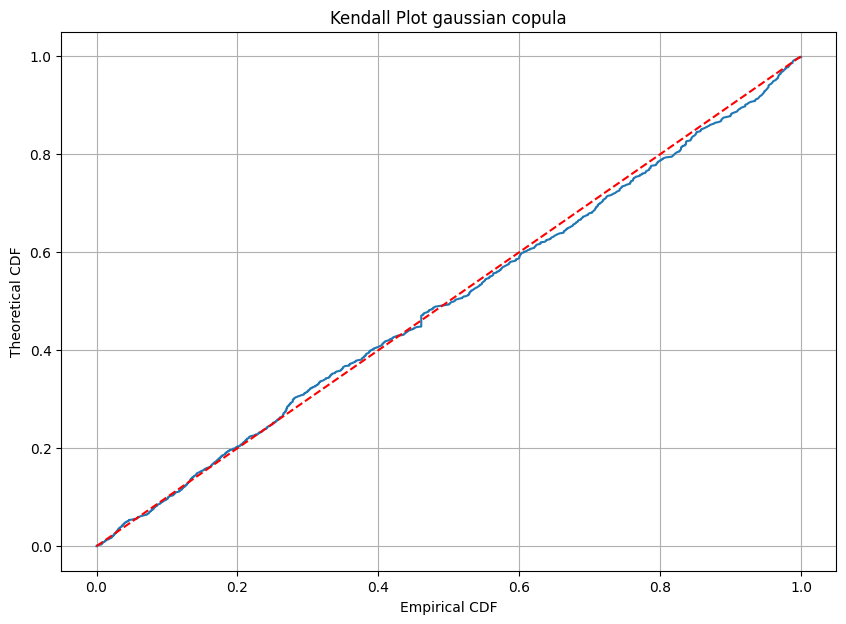

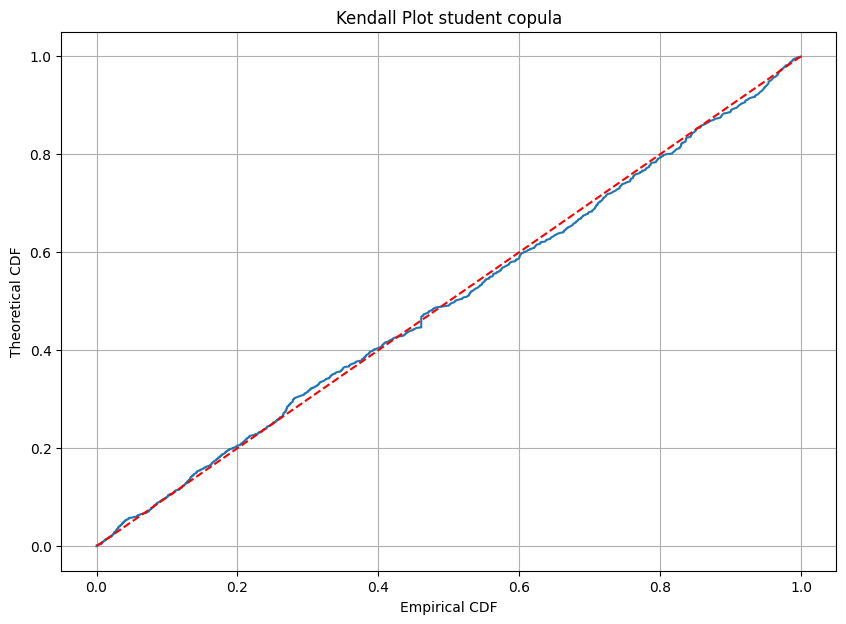

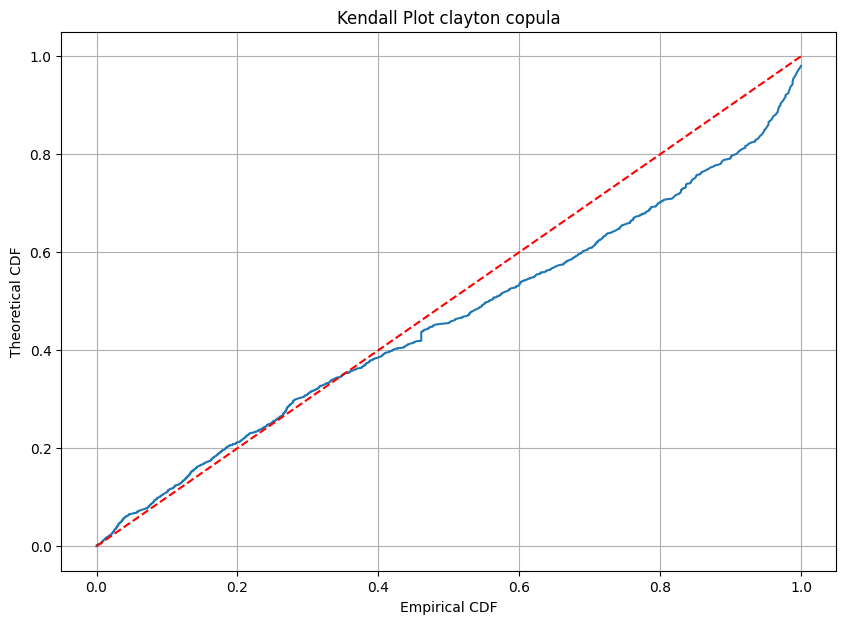

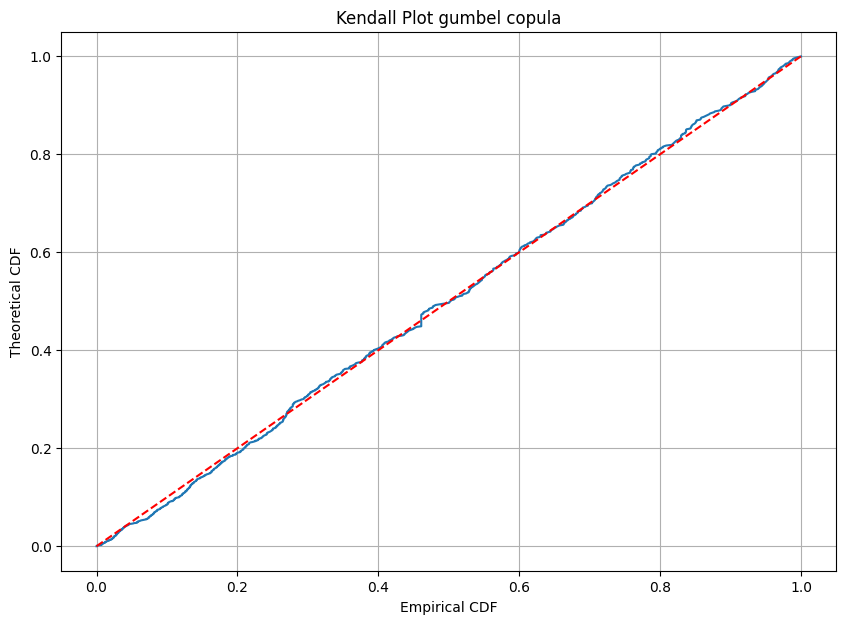

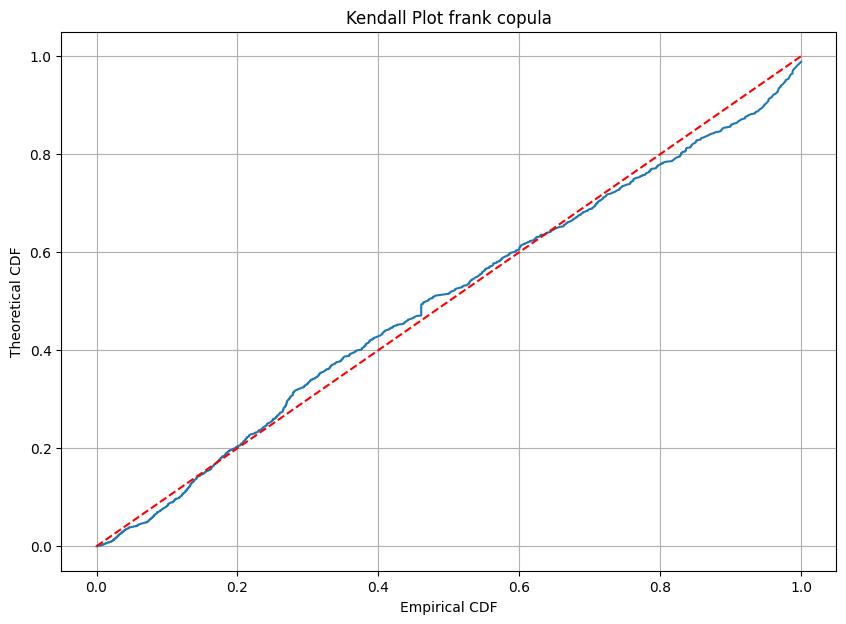

In [80]:
# Plot
for copula_type in copulas:
    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(H_i), np.sort(MonteCarlo_Hi[copula_type]))
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel("Empirical CDF")
    plt.ylabel("Theoretical CDF")
    plt.title(f"Kendall Plot {copula_type} copula")
    plt.grid(True)
    plt.show()

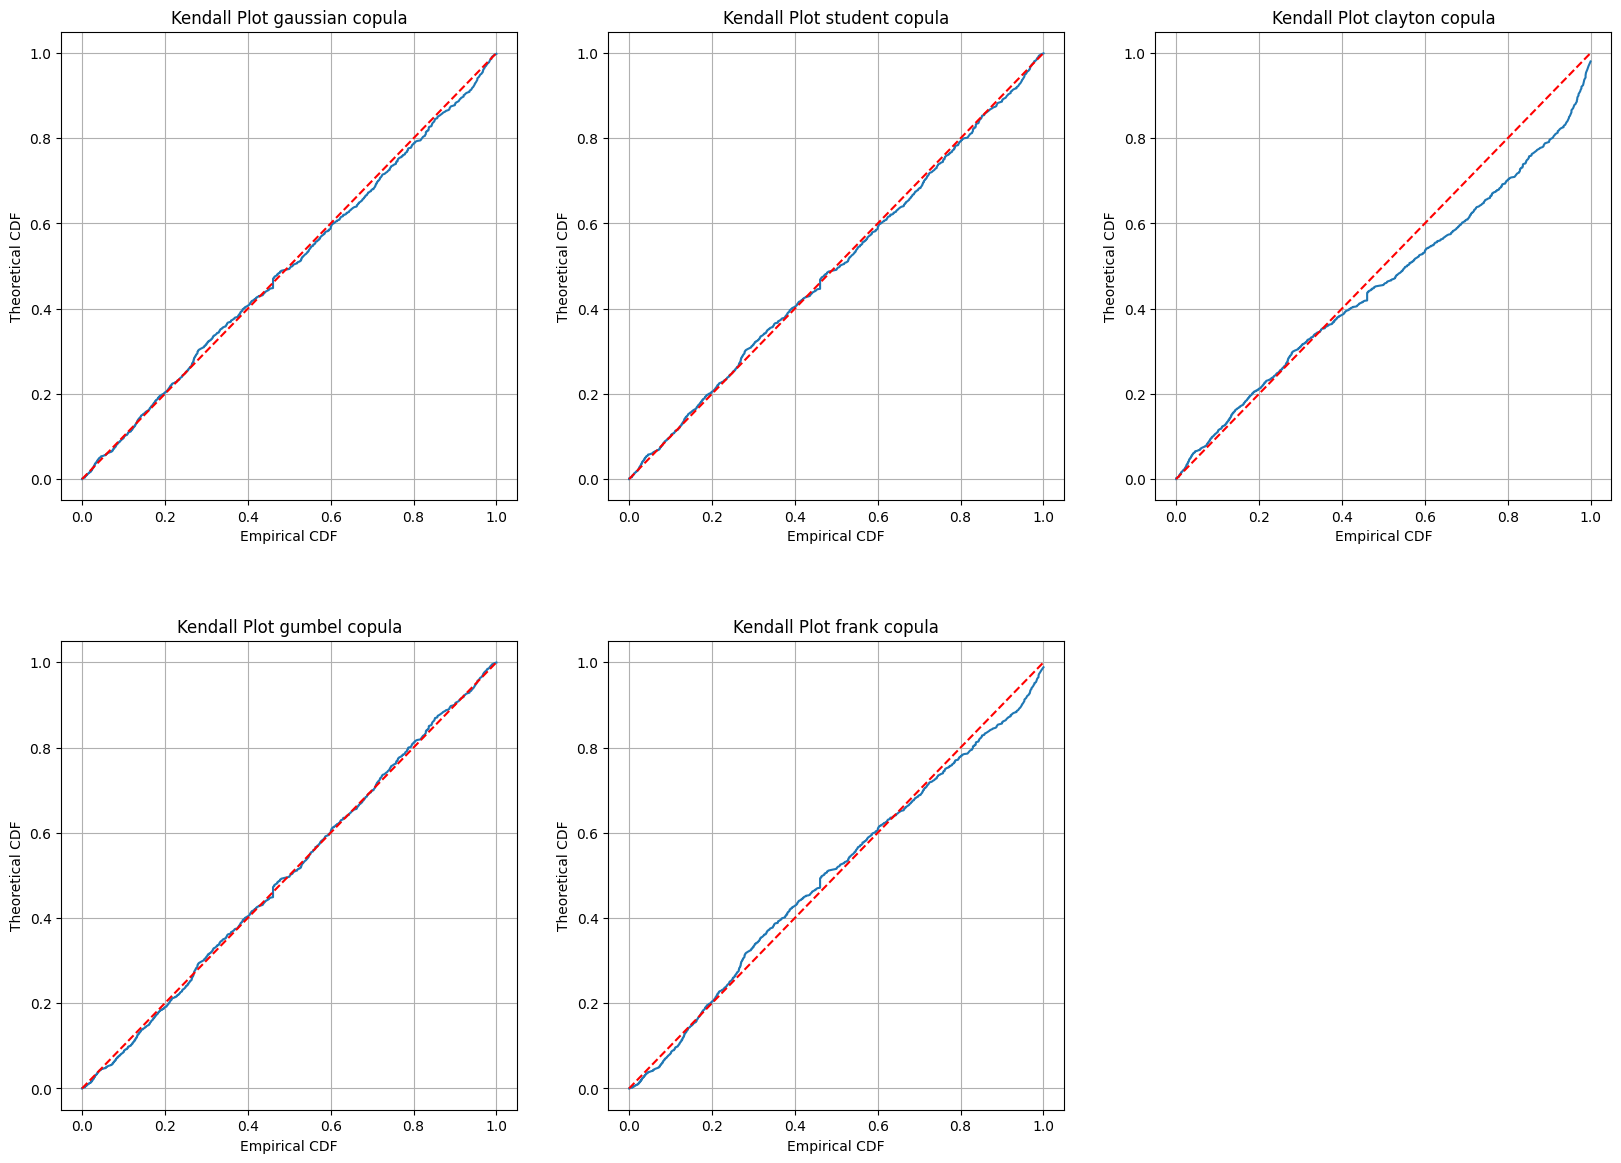

In [81]:

fig, axs = plt.subplots(2, 3, figsize=(20, 14)) # Ajout explicite du nombre de colonnes

# Ajustement des espaces entre les graphiques
plt.subplots_adjust(hspace=0.3, wspace=0.2)

copulas = ["gaussian", "student", "clayton", "gumbel", "frank"]
for i, copula_type in enumerate(copulas):
    # Calcul de l'index de la ligne et de la colonne pour le subplot courant
    row = i // 3
    col = i % 3
    ax = axs[row, col]  # Utilisation des bons indices de ligne et de colonne
    
    ax.plot(np.sort(H_i), np.sort(MonteCarlo_Hi[copula_type]))
    ax.plot([0, 1], [0, 1], color="red", linestyle="--")
    ax.set_xlabel("Empirical CDF")
    ax.set_ylabel("Theoretical CDF")
    ax.set_title(f"Kendall Plot {copula_type} copula")
    ax.grid(True)

# Suppression du subplot inutilisé dans la seconde ligne (dans la troisième colonne)
fig.delaxes(axs[1][2])  # Correction de l'accès au subplot pour le supprimer

plt.show()


### Tests d'adéquation et comparaison des copules 

In [82]:
def calcul_U(data):
    """ Calcul des pseudo observations"""
    n = len(data)
    U_hat = np.zeros((n,2))
    for i in range(n):
        cond1 = data[:, 0] <= data[i, 0]  # u_{1,k} <= u_{1,i}
        cond2 = data[:, 1] <= data[i, 1]  # u_{2,k} <= u_{2,i}
        U_hat[i] = [len(data[cond1])/n, len(data[cond2])/n]
    return U_hat

In [83]:
U_hat = calcul_U(returns.values)
U_hat

array([[0.66966967, 0.67167167],
       [0.72072072, 0.81581582],
       [0.27327327, 0.2002002 ],
       ...,
       [0.95495495, 0.98098098],
       [0.55455455, 0.62762763],
       [0.98298298, 0.997998  ]])

In [84]:
def calcul_emp_copula(u, U_hat):
    """Calcul de la copule empirique en u à partir des pseudo observations U_hat"""
    n = len(U_hat)
    cond1 = U_hat[:, 0] <= u[0]
    cond2 = U_hat[:, 1] <= u[1]
    return (np.sum(np.logical_and(cond1, cond2)))/n

In [85]:
def param_estimator(initial_params, copula_type, data):
    """ Estimation des paramètres de la copule selon les données data et les paramètres initiaux initial_params """ 
    minim = minimize(log_likelihood_copul, x0=initial_params, args=(data, copula_type), method='Nelder-Mead')
    return minim.x

In [86]:
def calcul_T(U_hat, copula_type, initial_params):
    """ Calcul de la statistique de test Tn """
    n = len(U_hat)
    emp_copulas = [calcul_emp_copula(U_hat[i], U_hat) for i in range(n)]
    params = param_estimator(initial_params, copula_type, U_hat)
    if copula_type == "student":
        corr, df = params
        u = StudentTCopula(df=df, corr=corr)
    elif copula_type == "gaussian":
        corr = params[0]
        u = GaussianCopula(corr = corr)
    elif copula_type == "gumbel":
        theta = params[0]
        u= GumbelCopula(theta = theta)
    elif copula_type == "clayton":
        theta = params[0]
        u= ClaytonCopula(theta = theta)
    elif copula_type == "frank":
        theta = params[0]
        u= FrankCopula(theta = theta)
    else:
        raise ValueError("Unsupported copula type")
    theor_copulas = [u.pdf(U_hat[i]) for i in range(n)]
    distance = [(emp_copulas[i]-theor_copulas[i])**2 for i in range(n)]

    T = np.nansum(distance)
    return params, T

In [87]:
def Calcul_MonteCarlo_pvalue(copula_type, U_hat, initial_params, S, n=999):
    """ Calcul de la pvalue """
    params, T = calcul_T(U_hat, copula_type, initial_params)
    print(f"{copula_type} copula:")
    print(f"Les paramètres estimés sont {params}")
    print(f"T: {T}")
    MonteCarloT = np.zeros(S)
    
    for s in range(S):
        print(f"Etape {s}:\n")
        if copula_type == "student":
            corr, df = params
            u = StudentTCopula(df=df, corr=corr)
        elif copula_type == "gaussian":
            corr = params[0]
            u = GaussianCopula(corr = corr)
        elif copula_type == "gumbel":
            theta = params[0]
            u= GumbelCopula(theta = theta)
        elif copula_type == "clayton":
            theta = params[0]
            u= ClaytonCopula(theta = theta)
        elif copula_type == "frank":
            theta = params[0]
            u= FrankCopula(theta = theta)
        else:
            raise ValueError("Unsupported copula type")
        data = u.rvs(n)
        pseudo_U = calcul_U(data)
        pseudo_params, pseudo_T = calcul_T(pseudo_U, copula_type, initial_params)
        print(f"pseudo_T{s}: {pseudo_T}")
        MonteCarloT[s]= pseudo_T
    pvalue = len(MonteCarloT[MonteCarloT>=T])/S
    return pvalue


In [104]:
pvalues = {}
initials = [[0.6], [0.6,3], [3], [3], [3]]
for i,copula_type in enumerate(copulas):
    pvalues[copula_type] = Calcul_MonteCarlo_pvalue(copula_type, U_hat, initials[i], S = 500, n = 999)

gaussian copula:
Les paramètres estimés sont [0.6]
T: 6583.158274346817
Etape 0:

pseudo_T0: 3208.6188964215667
Etape 1:

pseudo_T1: 2944.4305425539324
Etape 2:

pseudo_T2: 4159.804438577677
Etape 3:

pseudo_T3: 2907.9973819608285
Etape 4:

pseudo_T4: 4412.4477866363795
Etape 5:

pseudo_T5: 2672.960583020669
Etape 6:

pseudo_T6: 3547.6509164285335
Etape 7:

pseudo_T7: 4242.319618784521
Etape 8:

pseudo_T8: 2941.7016173419734
Etape 9:

pseudo_T9: 3100.468452352896
Etape 10:

pseudo_T10: 3679.639252169071
Etape 11:

pseudo_T11: 4106.7167724326555
Etape 12:

pseudo_T12: 3052.4558788944514
Etape 13:

pseudo_T13: 3431.0661416312923
Etape 14:

pseudo_T14: 3038.351365710757
Etape 15:

pseudo_T15: 4841.441561947524
Etape 16:

pseudo_T16: 3151.1217979396074
Etape 17:

pseudo_T17: 3833.4401222328656
Etape 18:

pseudo_T18: 3846.1701079215645
Etape 19:

pseudo_T19: 3446.32088052048
Etape 20:

pseudo_T20: 3975.087937523109
Etape 21:

pseudo_T21: 3980.0023313673546
Etape 22:

pseudo_T22: 4495.772969

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tools\rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)


pseudo_T2: 566277.2782264828
Etape 3:

pseudo_T3: 738352.9989693029
Etape 4:

pseudo_T4: 75866.1022773177
Etape 5:

pseudo_T5: 648258.771405983
Etape 6:

pseudo_T6: 581435.4955242532
Etape 7:

pseudo_T7: 604075.0221036822
Etape 8:

pseudo_T8: 229992.45476320272
Etape 9:

pseudo_T9: 93833.93277468636
Etape 10:

pseudo_T10: 667403.1171755226
Etape 11:

pseudo_T11: 197031.38701658728
Etape 12:

pseudo_T12: 107211.96917699516
Etape 13:

pseudo_T13: 128798.23932305348
Etape 14:

pseudo_T14: 757932.8441637511
Etape 15:

pseudo_T15: 530853.8687962764
Etape 16:

pseudo_T16: 522836.31747756863
Etape 17:

pseudo_T17: 467874.5738487635
Etape 18:

pseudo_T18: 147230.60180601903
Etape 19:

pseudo_T19: 707940.7173377301
Etape 20:

pseudo_T20: 538577.0211097242
Etape 21:

pseudo_T21: 642497.0839182371
Etape 22:

pseudo_T22: 681765.711566926
Etape 23:

pseudo_T23: 624738.7767922414
Etape 24:

pseudo_T24: 789659.2840359707
Etape 25:

pseudo_T25: 608080.6918706179
Etape 26:

pseudo_T26: 527404.748240472

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\distributions\copula\archimedean.py:188: RuntimeWarning: divide by zero encountered in log
  logpdfv = np.sum(np.log(np.abs(phi_d1(u, *args))), axis)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\distributions\copula\transforms.py:159: RuntimeWarning: invalid value encountered in divide
  d2 = ((phi**(2 / th) + (th - 1) * phi**(1 / th))) / (phi**2 * th**2)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\distributions\copula\archimedean.py:452: RuntimeWarning: divide by zero encountered in scalar power
  c = sum_xy_theta ** (1.0 / th - 2)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\distributions\copula\archimedean.py:456: RuntimeWarning: invalid value encountered in scalar multiply
  return a * b * c * d * e
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimiz

gumbel copula:
Les paramètres estimés sont [3.]
T: 43263.10637300516
Etape 0:

pseudo_T0: 81420.10983371138
Etape 1:

pseudo_T1: 155440.0478053754
Etape 2:

pseudo_T2: 461733.26670228713
Etape 3:

pseudo_T3: 146173.61260445736
Etape 4:

pseudo_T4: 534127.1030753595
Etape 5:

pseudo_T5: 483179.12084615516
Etape 6:

pseudo_T6: 112108.5032439849
Etape 7:

pseudo_T7: 178753.26010316872
Etape 8:

pseudo_T8: 37763.820821365225
Etape 9:

pseudo_T9: 63093.28497963388
Etape 10:

pseudo_T10: 62458.46387146635
Etape 11:

pseudo_T11: 590917.5155643616
Etape 12:

pseudo_T12: 50899.54733514317
Etape 13:

pseudo_T13: 482557.07994965144
Etape 14:

pseudo_T14: 176086.4176205335
Etape 15:

pseudo_T15: 112577.8513646576
Etape 16:

pseudo_T16: 68006.24377200565
Etape 17:

pseudo_T17: 46024.75679843989
Etape 18:

pseudo_T18: 181363.90393910816
Etape 19:

pseudo_T19: 573206.1946628676
Etape 20:

pseudo_T20: 91625.11020755429
Etape 21:

pseudo_T21: 471556.84213103994
Etape 22:

pseudo_T22: 607087.0934617543


In [108]:
pvalues = pd.DataFrame([pvalues])
pvalues

# Calcul de la CreditVar

In [42]:
# Calcul de la credit var par monte carlo


def credit_var(alpha_bnp,alpha_sg,beta_bnp,beta_sg,lambda_bnp,lambda_sg,nominal,rho_gumbel,S,tau):
    """
        Cette fonction est Var de niveau alpha qui estime la perte maximale sur l'horizon 4 ans 
        et retourne le quantile de niveau 99%
    Args:
        alpha_bnp (réel : float): paramètre alpha de la loi beta qui estime la sévérité de la perte de bnp
        alpha_sg (réel): paramètre alpha de la loi beta qui estime la sévérité de la perte de sg
        beta_bnp (réel): paramètre beta de la loi beta qui estime la sévérité de la perte de bnp
        beta_sg (réel): paramètre beta de la loi beta qui estime la sévérité de la perte de sg
        lambda_bnp (réel): intensité de la perte bnp
        lambda_sg (réel): intensité de la perte sg
        nominal (réel): prêt octroyé à chacune des entreprises.
        rho_gumbel (réel) : paramètre de la copule de Gumbel
        S (entier: int): taille d'échantillon.

    Returns:
        float: Le quantile de niveau 99%
    """
    copula = GumbelCopula(theta=rho_gumbel).rvs(S, random_state=42)

    # Générer des échantillons pour lgd_bnp et lgd_sg avec la loi Beta, vectorisée
    lgd_bnp = 1 - np.random.beta(alpha_bnp, beta_bnp, S)
    lgd_sg = 1 - np.random.beta(alpha_sg, beta_sg, S)

    # Simuler tau_bnp et tau_sg en utilisant la fonction de répartition inverse de la loi exponentielle
    tau_bnp = stats.expon.ppf(copula[:, 0], scale=1/lambda_bnp)
    tau_sg = stats.expon.ppf(copula[:, 1], scale=1/lambda_sg)

    # Calculer les pertes, vectorisée
    L_bnp = np.where(tau_bnp < tau, lgd_bnp * nominal, 0)
    L_sg = np.where(tau_sg < tau, lgd_sg * nominal, 0)

    # Somme des pertes
    pertes = L_bnp + L_sg

    # Calculer et retourner le quantile de niveau 99%
    return np.percentile(pertes, 99)
    

In [43]:
S = 1000
nominal = 1000

rho_gumbel = params_result["gumbel"][0]

lambda_bnp = probabilites_defaut["BNP"]["4 ans"]
lambda_sg = probabilites_defaut["SG"]["4 ans"]

tau = 4


credit_var(alpha_bnp, alpha_sg, beta_bnp, beta_sg, lambda_bnp, lambda_sg, nominal, rho_gumbel, S, tau)

1375.0888738243905

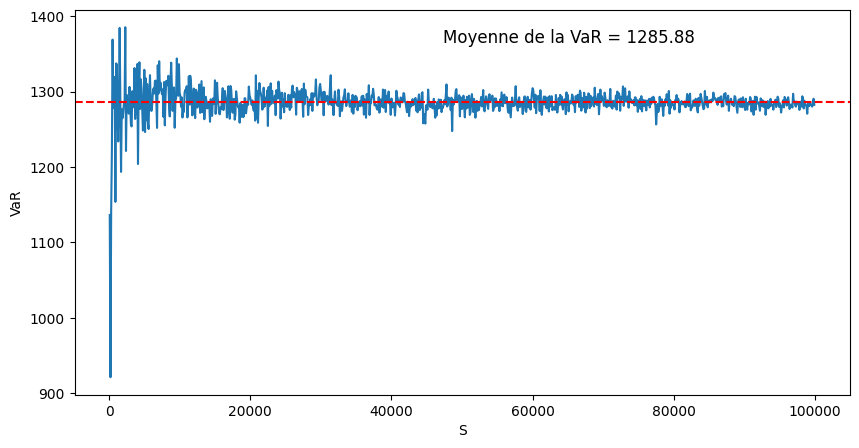

In [44]:
# Tracer la courbe de la VaR en fonction de S

S_values = np.arange(100, 100000, 100)
VaR_values = [credit_var(alpha_bnp, alpha_sg, beta_bnp, beta_sg, lambda_bnp, lambda_sg, nominal, rho_gumbel, S, tau) for S in S_values]
# Je veux tracer une droite horizontale pour la mediane de la VaR et mettre ça valeur sur l'axe des ordonnées
plt.figure(figsize=(10, 5))
plt.plot(S_values, VaR_values)
plt.axhline(np.mean(VaR_values), color="red", linestyle="--")

plt.annotate(f"Moyenne de la VaR = {np.mean(VaR_values):.2f}", xy=(0.8, 0.95), xycoords='axes fraction',
             fontsize=12, horizontalalignment='right', verticalalignment='top')


plt.xlabel("S")
plt.ylabel("VaR")
plt.grid(False)
plt.show()


## Différents dépendogrammes

In [163]:
copula_gaussian = GaussianCopula(corr=params_result["gaussian"][0]).rvs(len(dependo), random_state=42)
copula_student = StudentTCopula(df=params_result["student"][1], corr=params_result["student"][0]).rvs(len(dependo), random_state=42)
copula_clayton = ClaytonCopula(theta=params_result["clayton"][0]).rvs(len(dependo), random_state=42)
copula_frank = FrankCopula(theta=params_result["frank"][0]).rvs(len(dependo), random_state=42)
copula_guembel = GumbelCopula(theta=rho_gumbel).rvs(len(dependo), random_state=42)

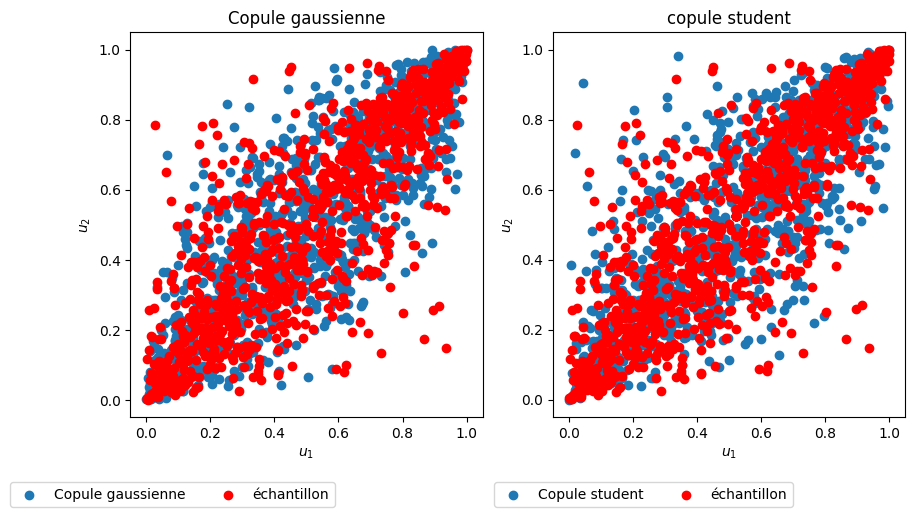

In [164]:
# Copule elliptique : Gaussian and Student

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1) # 1 ligne, 2 colonnes, premier graphique
# nuages de points des données BNP et SG
plt.scatter(copula_gaussian[:, 0], copula_gaussian[:, 1],label="Copule gaussienne")

plt.scatter(dependo["BNP"], dependo["SG"],c="red",label="échantillon")


plt.title("Copule gaussienne")
plt.xlabel("$u_{1}$")
plt.ylabel("$u_{2}$")
plt.legend(loc='best', bbox_to_anchor=(0.6, -0.15), ncol=4)
plt.grid(False)

plt.subplot(1,2,2)
plt.scatter(copula_student[:, 0], copula_student[:, 1],label="Copule student")
plt.scatter(dependo["BNP"], dependo["SG"],c="red",label="échantillon")

plt.title("copule student")
plt.xlabel("$u_{1}$")
plt.ylabel("$u_{2}$")
plt.legend(loc='best', bbox_to_anchor=(0.7, -0.15), ncol=4)
plt.grid(False)
plt.show()

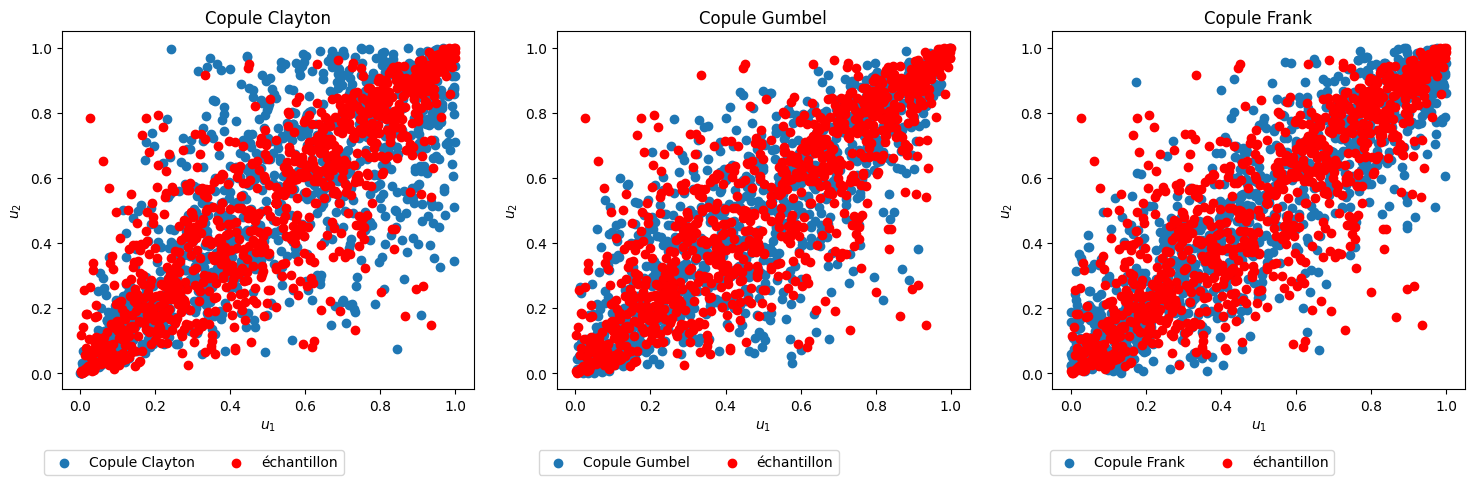

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # Ajustez la taille de la figure pour mieux voir les trois sous-graphiques

plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, premier graphique
plt.scatter(copula_clayton[:, 0], copula_clayton[:, 1], label='Copule Clayton')
plt.scatter(dependo["BNP"], dependo["SG"], c="red", label='échantillon')
plt.title("Copule Clayton")
plt.xlabel("$u_{1}$")
plt.ylabel("$u_{2}$")
plt.legend(loc='best', bbox_to_anchor=(0.7, -0.15), ncol=4)
plt.grid(False)

plt.subplot(1, 3, 2)  # Deuxième graphique
plt.scatter(copula_guembel[:, 0], copula_guembel[:, 1], label='Copule Gumbel')
plt.scatter(dependo["BNP"], dependo["SG"], c="red", label='échantillon')
plt.title("Copule Gumbel")
plt.xlabel("$u_{1}$")
plt.ylabel("$u_{2}$")
plt.legend(loc='best', bbox_to_anchor=(0.7, -0.15), ncol=4)
plt.grid(False)

plt.subplot(1, 3, 3)  # Troisième graphique
plt.scatter(copula_frank[:, 0], copula_frank[:, 1], label='Copule Frank')
plt.scatter(dependo["BNP"], dependo["SG"], c="red", label='échantillon')
plt.title("Copule Frank")
plt.xlabel("$u_{1}$")
plt.ylabel("$u_{2}$")
plt.legend(loc='best', bbox_to_anchor=(0.7, -0.15), ncol=4)
plt.grid(False)

plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour qu'ils s'insèrent dans la figure
plt.show()
